m# Lista 0

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Zadanie 1

### Podpunkt 1

In [3]:
df1 = pd.read_csv('data1.csv')

/home/michal/PycharmProjects/Artificial-Inteligence/ML/exercises/2


In [4]:
df1

,x1,x2,y
0,-9.632982,380.285723,-382.598729
1,60.908243,239.463394,-170.322897
2,-198.541302,62.397808,-252.646037
3,-420.984843,346.470458,-760.169653
4,5.043047,283.229031,-268.320209
...,...,...,...
95,-328.624808,358.886303,-680.164441
96,313.175011,253.240583,69.699882
97,-20.346170,139.683830,-151.625018
98,56.275054,358.844104,-295.829934


<Axes: xlabel='y', ylabel='Density'>

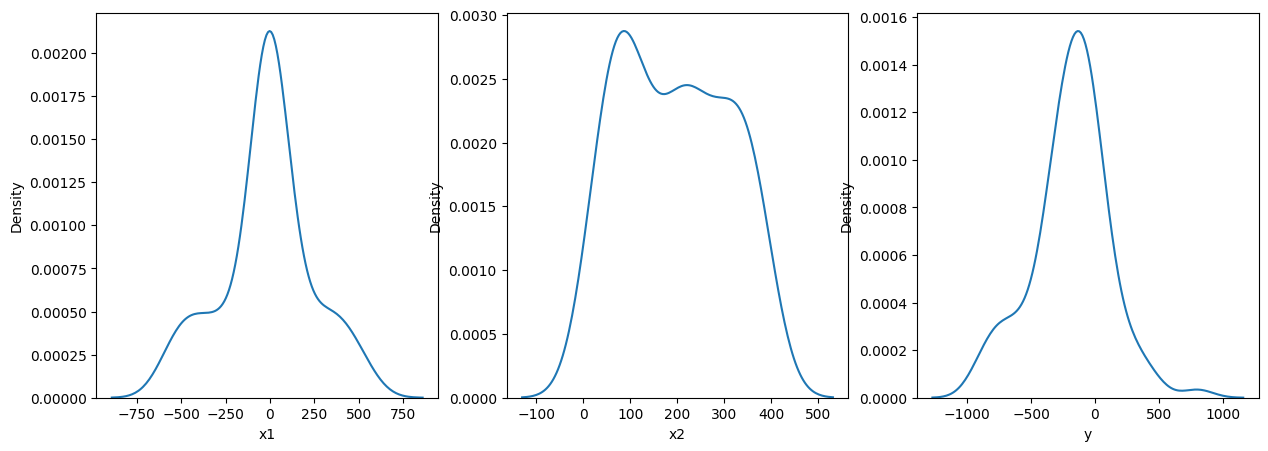

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.kdeplot(df1['x1'], ax=axes[0])
sns.kdeplot(df1['x2'], ax=axes[1])
sns.kdeplot(df1['y'], ax=axes[2])

<Axes: xlabel='x2', ylabel='y'>

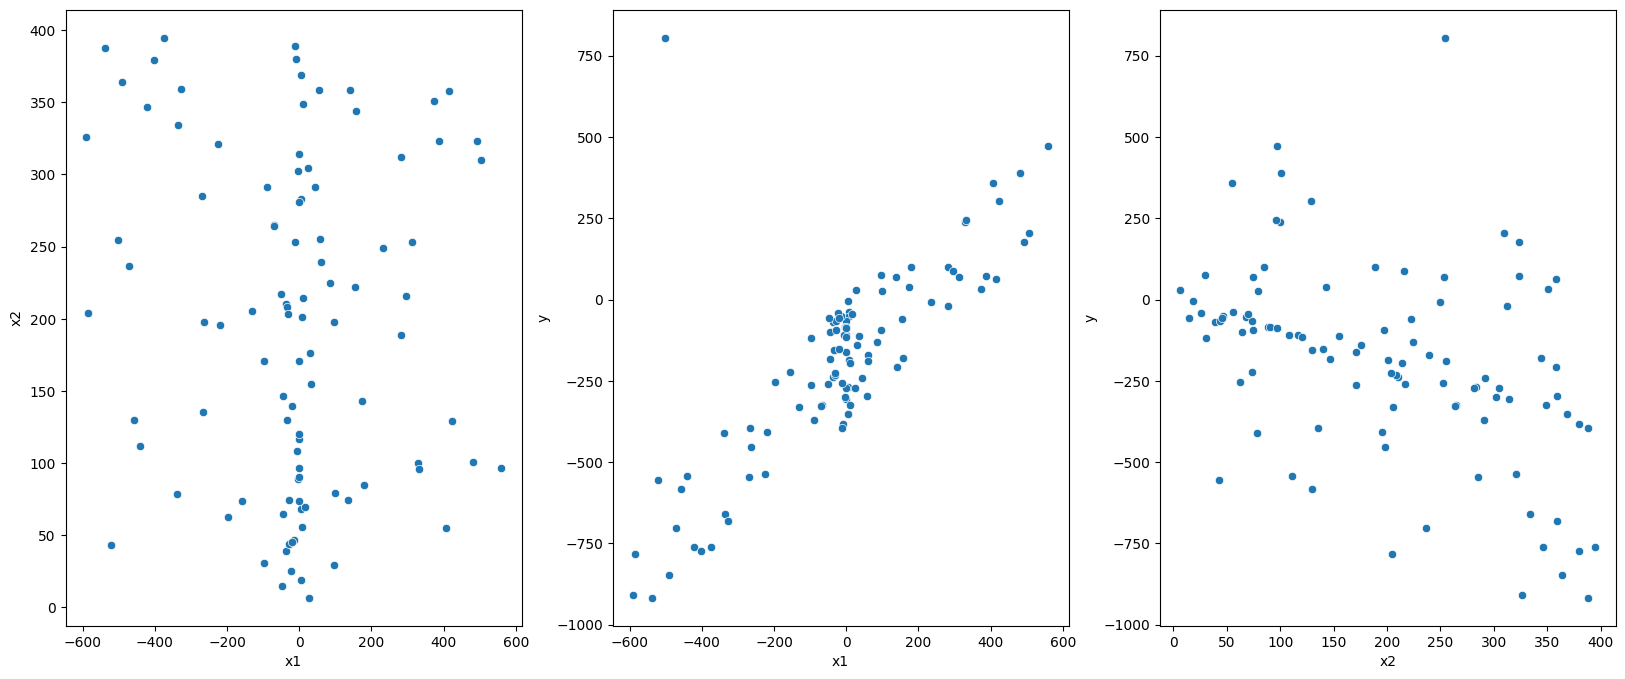

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))
sns.scatterplot(df1, x='x1', y='x2', ax=axes[0])
sns.scatterplot(df1, x='x1', y='y', ax=axes[1])
sns.scatterplot(df1, x='x2', y='y', ax=axes[2])

<Axes: >

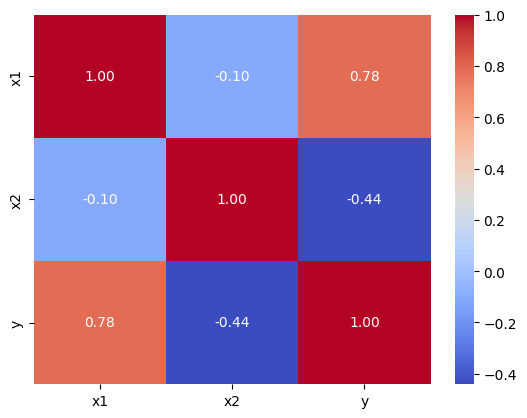

In [60]:
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm")

x1 i y sa skorelowane mocno

x2 i y sa skorelowane troche

x1 i x2 nie sa skorelowane

In [38]:
def preprocess_data(X_train, y_train):
    X_train_scaled = (X_train - X_train.mean()) / np.std(X_train)
    y_train_scaled = (y_train - y_train.mean()) / np.std(y_train)
    return X_train_scaled, y_train_scaled

In [41]:
xs, ys = preprocess_data(df1['x1'], df1['y'])

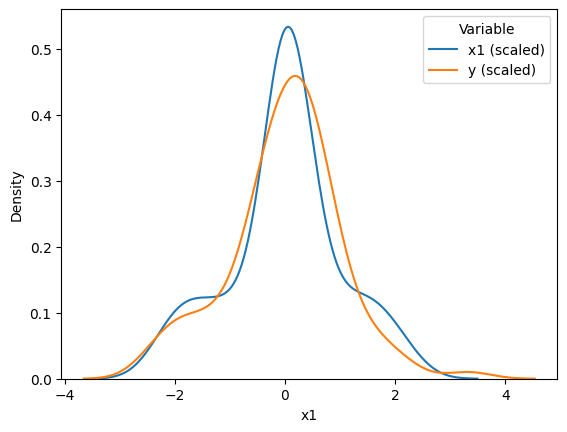

In [46]:
sns.kdeplot(xs, label='x1 (scaled)')
sns.kdeplot(ys, label='y (scaled)')
plt.legend(title='Variable')
plt.show()